In [8]:
import data_loader as loader
import data_transformer as transformer
from tqdm.auto import trange
from scipy.io import loadmat

In [9]:
subject_names = ['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5', 'Patient_1', 'Patient_2']
subject_data_length_count = []
for i in trange(len(subject_names), desc='Subject'):
    files, path = loader.load_subject(subject_names[i])
    ffiles = transformer.exclude_test(files)
    data_length_count = []
    for j in trange(len(ffiles), desc='data_length'):
        fpath = path + '/' + ffiles[i]
        mat = loadmat(fpath)
        segment_label = list(mat.keys())[-1]
        X = mat[segment_label]
        data_length_count.append(X['data_length_sec'][0][0][0][0])
    subject_data_length_count.append(data_length_count)

Subject:   0%|          | 0/7 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1006 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1006 [00:00<?, ?it/s]

data_length:   0%|          | 0/504 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1542 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1542 [00:00<?, ?it/s]

data_length:   0%|          | 0/542 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/2419 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/2419 [00:00<?, ?it/s]

data_length:   0%|          | 0/1512 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1891 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1891 [00:00<?, ?it/s]

data_length:   0%|          | 0/901 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/671 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/671 [00:00<?, ?it/s]

data_length:   0%|          | 0/480 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/263 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/263 [00:00<?, ?it/s]

data_length:   0%|          | 0/68 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/210 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/210 [00:00<?, ?it/s]

data_length:   0%|          | 0/60 [00:00<?, ?it/s]

In [22]:
import numpy as np

In [36]:
subject_data_length_sum = [np.sum(data_len) for data_len in subject_data_length_count]

In [45]:
print(subject_names)
data_length_sum_hrs = np.array(subject_data_length_sum) / 3600
data_length_sum_hrs

['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5', 'Patient_1', 'Patient_2']


array([ 84.        ,  90.33333333, 252.        , 150.16666667,
        80.        ,  11.33333333,  10.        ])

Data length above is presented in terms of hours.

In [31]:
import matplotlib.pyplot as plt

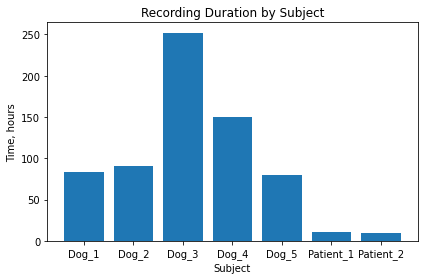

In [51]:
fig, ax = plt.subplots()
ax.bar(subject_names, data_length_sum_hrs)

ax.set_title('Recording Duration by Subject')
ax.set_ylabel('Time, hours')
ax.set_xlabel('Subject')

fig.tight_layout()
plt.show()
fig.savefig('images/recording_duration_subject.png')